In [1]:
# data handling libraries
import pandas as pd
import numpy as np
import scipy
from scipy.sparse import csr_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.layers.core import Dropout
from keras import regularizers

# data visualization libraries
import matplotlib.pyplot as plt

# data Preprocessing Libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

# text Cleaning Libraries
import re
import nltk
from nltk.corpus import stopwords 
stops = stopwords.words("english")

# data Validation Split
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# filtering warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Aerotek_Resume_Classification.csv")

In [3]:
df

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [4]:
le=LabelEncoder()

In [5]:
df["Category"]=le.fit_transform(df["Category"])

In [6]:
def data_cleaning(text):
    text = text.lower() # convert everything into lower case
    text = re.sub("[^a-z]"," ",text) # ("allow","replace","data")
    text = re.sub("http\S+"," ",text,flags=re.MULTILINE) # replaces hyperlinks with space and flags is to recursively check hyperlinks
    words = text.split()  # Split the entire sentence into words
    imp_words = [w for w in words if w not in stops] # Picking up only imp words after filtering out the stop words
    
    return(" ".join(imp_words))

In [7]:
df["cleaned_resume"] = df["Resume"].apply(lambda x : data_cleaning(x)) 

In [8]:
df.head()

,Category,Resume,cleaned_resume
0,0,Skills * Programming Languages: Python (pandas...,skills programming languages python pandas num...
1,0,Education Details \r\nMay 2013 to May 2017 B.E...,education details may may b e uit rgpv data sc...
2,0,"Areas of Interest Deep Learning, Control Syste...",areas interest deep learning control system de...
3,0,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skills r python sap hana tableau sap hana sql ...
4,0,"Education Details \r\n MCA YMCAUST, Faridab...",education details mca ymcaust faridabad haryan...


In [9]:
x = df["cleaned_resume"]
y = df["Category"]

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=1)

In [11]:
tf_idf = TfidfVectorizer()

In [12]:
x_train_tf = tf_idf.fit_transform(x_train)
x_test_tf = tf_idf.transform(x_test)

In [13]:
x_train = csr_matrix.todense(x_train_tf)
x_test = csr_matrix.todense(x_test_tf)

In [14]:
x_train.shape

(865, 7122)

In [15]:
model = Sequential([
    Dense(7000, activation= "tanh", input_shape = (7122,)),
    Dense(128, activation='relu',kernel_regularizer=regularizers.l1(0.001)),
    Dropout(0.5),
    Dense(128, activation='relu',kernel_regularizer=regularizers.l1(0.001)),
    Dropout(0.5),
    Dense(256, activation='relu',kernel_regularizer=regularizers.l1(0.001)),
    Dropout(0.5),
    Dense(6, activation="softmax")
])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7000)              49861000  
                                                                 
 dense_1 (Dense)             (None, 128)               896128    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 256)               33024     
                                                                 
 dropout_2 (Dropout)         (None, 256)               0

In [17]:
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [18]:
history = model.fit(x_train, y_train,batch_size=100, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
9/9 [==============================] - 3s 294ms/step - loss: 14.8146 - accuracy: 0.3040 - val_loss: 10.9653 - val_accuracy: 0.3608
Epoch 2/10
9/9 [==============================] - 3s 274ms/step - loss: 8.8840 - accuracy: 0.3827 - val_loss: 6.6092 - val_accuracy: 0.4330
Epoch 3/10
9/9 [==============================] - 3s 280ms/step - loss: 5.5365 - accuracy: 0.5179 - val_loss: 4.6570 - val_accuracy: 0.5258
Epoch 4/10
9/9 [==============================] - 2s 271ms/step - loss: 4.3460 - accuracy: 0.5954 - val_loss: 4.0043 - val_accuracy: 0.5979
Epoch 5/10
9/9 [==============================] - 3s 282ms/step - loss: 3.6067 - accuracy: 0.6728 - val_loss: 3.3529 - val_accuracy: 0.5979
Epoch 6/10
9/9 [==============================] - 2s 275ms/step - loss: 3.0705 - accuracy: 0.7260 - val_loss: 2.9102 - val_accuracy: 0.7938
Epoch 7/10
9/9 [==============================] - 2s 266ms/step - loss: 2.6574 - accuracy: 0.8335 - val_loss: 2.5733 - val_accuracy: 0.8763
Epoch 8/10
9/9 [==

In [19]:
history.history["accuracy"]

[0.30404624342918396,
 0.3826589584350586,
 0.5179190635681152,
 0.5953757166862488,
 0.6728323698043823,
 0.7260115742683411,
 0.8335260152816772,
 0.9144508838653564,
 0.9190751314163208,
 0.9294797778129578]

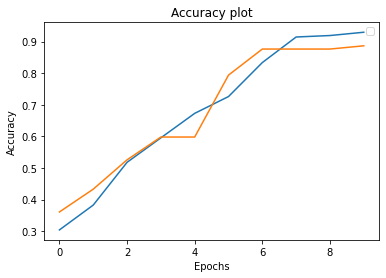

In [20]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy plot")
plt.legend("Training", "Testing")

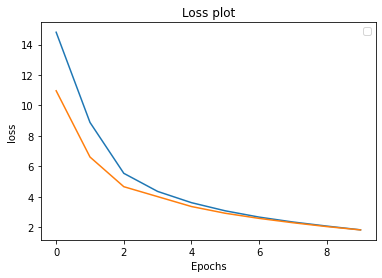

In [21]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.title("Loss plot")
plt.legend("Training", "Testing")